In [1]:
import pandas as pd

# Replace with the name of your uploaded CSV file
df = pd.read_csv('../data/UNRATE.csv')
# Display the first few rows
df.head()

,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [2]:
import pandas as pd

gdp = pd.read_csv('../data/GDPC1.csv', parse_dates=['observation_date']).rename(columns={'GDPC1': 'GDP'})
cpi = pd.read_csv('../data/CPIAUCSL.csv', parse_dates=['observation_date']).rename(columns={'CPIAUCSL': 'CPI'})
unemp = pd.read_csv('../data/UNRATE.csv', parse_dates=['observation_date']).rename(columns={'UNRATE': 'Unemployment'})

In [3]:
gdp.set_index('observation_date', inplace=True)
gdp = gdp.resample('MS').ffill()

cpi.set_index('observation_date', inplace=True)
unemp.set_index('observation_date', inplace=True)

In [4]:
df = gdp.join(cpi, how='inner').join(unemp, how='inner')
df.dropna(inplace=True)  # Just in case
print(df.head())


                       GDP    CPI  Unemployment
observation_date                               
1948-01-01        2239.682  23.68           3.4
1948-02-01        2239.682  23.67           3.8
1948-03-01        2239.682  23.50           4.0
1948-04-01        2276.690  23.82           3.9
1948-05-01        2276.690  24.01           3.5


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)


In [6]:
import numpy as np

def create_sequences(data, window=12):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled, window=12)


In [7]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(3)  # GDP, CPI, Unemployment
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1)


2025-05-21 06:05:30.883078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747807531.021942   11579 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747807531.059999   11579 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747807531.152675   11579 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747807531.152704   11579 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747807531.152708   11579 computation_placer.cc:177] computation placer alr

Epoch 1/100


2025-05-21 06:05:37.534778: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0305 - val_loss: 0.0053
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.0809e-04 - val_loss: 0.0022
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.2019e-04 - val_loss: 0.0018
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.4540e-04 - val_loss: 0.0017
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8522e-04 - val_loss: 0.0012
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.8589e-04 - val_loss: 8.5493e-04
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4145e-04 - val_loss: 0.0019
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7209e-04 - val_loss: 8.8873e-04
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.4016e-04 - val_loss: 8.9851e-04
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.1237e-04 - val_loss: 0.0013
Epoch 12/100
42/42 ━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


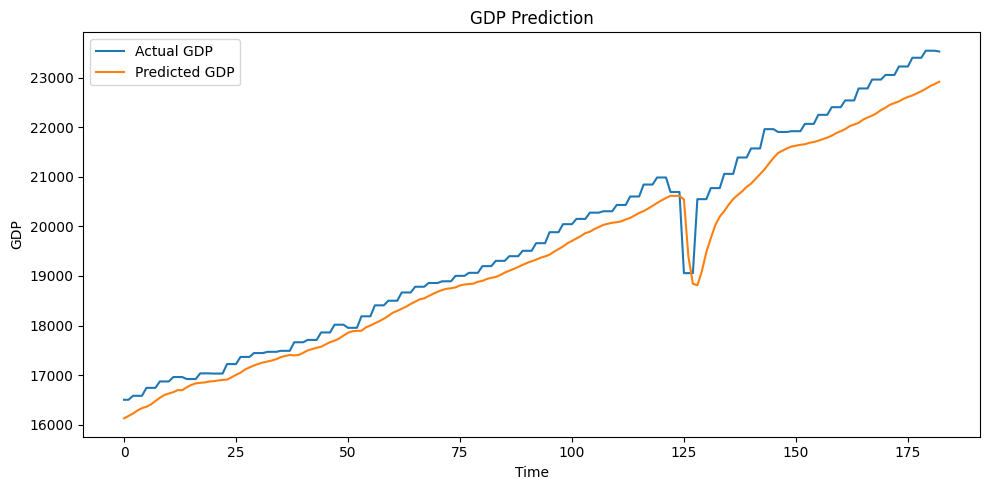

GDP MSE: 204229.18108953527


In [13]:
y_pred = model.predict(X_test)

# Rebuild full array with padding columns to inverse transform
pad = np.zeros((y_pred.shape[0], scaled.shape[1] - y_pred.shape[1]))
y_pred_full = np.hstack((y_pred, pad))
y_test_full = np.hstack((y_test, pad))

y_pred_inv = scaler.inverse_transform(y_pred_full)[:, :3]
y_test_inv = scaler.inverse_transform(y_test_full)[:, :3]

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(10, 5))
plt.plot(y_test_inv[:, 0], label='Actual GDP')
plt.plot(y_pred_inv[:, 0], label='Predicted GDP')
plt.legend()
plt.title("GDP Prediction")
plt.xlabel("Time")
plt.ylabel("GDP")
plt.tight_layout()
plt.savefig("gdp_prediction.png")
plt.show()

print("GDP MSE:", mean_squared_error(y_test_inv[:, 0], y_pred_inv[:, 0]))


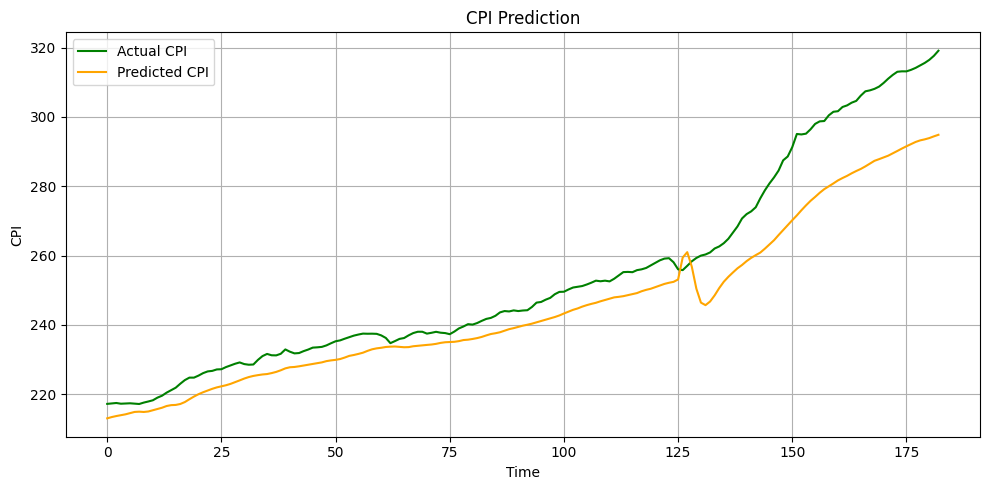

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv[:, 1], label='Actual CPI', color='green')
plt.plot(y_pred_inv[:, 1], label='Predicted CPI', color='orange')
plt.title("CPI Prediction")
plt.xlabel("Time")
plt.ylabel("CPI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("cpi_prediction.png")
plt.show()


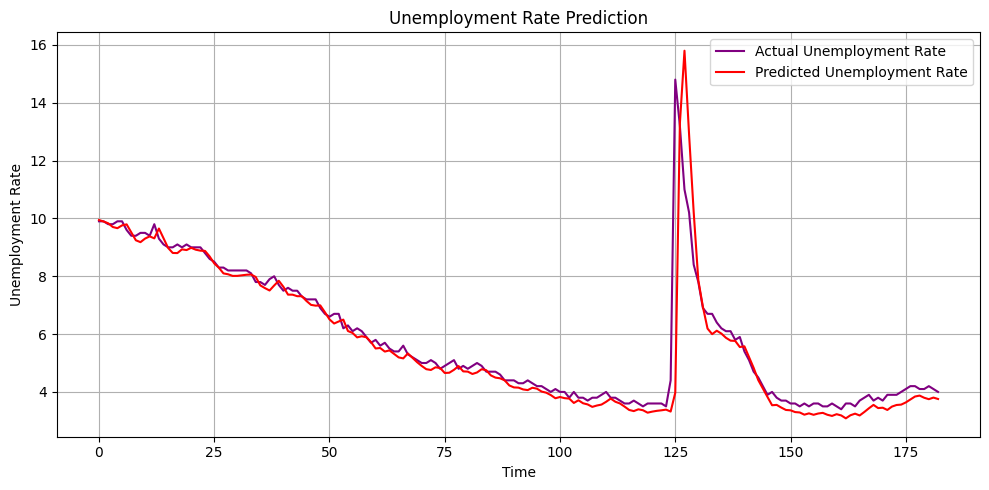

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv[:, 2], label='Actual Unemployment Rate', color='purple')
plt.plot(y_pred_inv[:, 2], label='Predicted Unemployment Rate', color='red')
plt.title("Unemployment Rate Prediction")
plt.xlabel("Time")
plt.ylabel("Unemployment Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("unemployment_rate_prediction.png")
plt.show()
